In [2]:
import pandas as pd
import re

In [2]:
# Import data
train = pd.read_csv("../data/train_complete.csv")
test = pd.read_csv("../data/test_complete.csv")

In [16]:
i = 500
train.iloc[:, i:i+10].head(10)

,P4_j_10(FromList),P4_j_11(FromList),P4_j_12(FromList),P4_j_13(FromList),P4_j_14(FromList),P4_j_15(FromList),P4_j_16(FromList),P4_j_17(FromList),P4_j_18(FromList),P4_j_19(FromList)
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [20]:
train["P4_j_13(FromList)"].value_counts()

P4_j_13(FromList)
False    3782
True       19
Name: count, dtype: int64

In [26]:
onehot = ["P1_m", "P3_c","P4_a", "P4_a2", "P4_b", "P4_c", "P4_d", "P4_e", "P4_g", "P4_j", "P5_b", "P6_a", "P6_b", "P6_g", "P6_h", "P7_a", "P7_b", "P7_d", "P8_a", "P8_b", "P8_c", "P8_d", "P2_b", "P2_d", "P2_f", "P2_o", "P2_r", "P6_c", "P6_d", "P6_e", "P6_f"]
ordered = ["P1_l", "P2_e", "P2_g", "P2_i", "P2_j", "P2_h"]
sensible = ['P1_c', 'P1_b','P1_a_1','P1_i_2', 'P1_i_1']

onehot_cols = [col for col in train.columns if any(col.startswith(c) for c in onehot + sensible) and col.endswith('(OneHot)')]
from_list_cols = [col for col in train.columns if any(col.startswith(c) for c in onehot + sensible) and col.endswith('(FromList)')]
ordered_cols = [col for col in train.columns if any(col.startswith(c) for c in ordered) and col.endswith('(OrdEnc)')]
df_train_selected = train[onehot_cols+from_list_cols+ordered_cols]
df_test_selected = test[onehot_cols+from_list_cols+ordered_cols]

len(ordered_cols)

6

In [27]:
X_train = df_train_selected.drop(columns=['P2_h(OrdEnc)'])
y_train = df_train_selected['P2_h(OrdEnc)']

X_test = df_test_selected.drop(columns=['P2_h(OrdEnc)'])
y_test = df_test_selected['P2_h(OrdEnc)']

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3801 entries, 0 to 3800
Columns: 334 entries, P1_a_1_17-21(OneHot) to P2_j(OrdEnc)
dtypes: bool(329), int64(5)
memory usage: 1.3 MB


In [35]:
x_train_subset = X_train.iloc[:50]
y_train_subset = y_train.iloc[:50]

x_test_subset = X_test.iloc[:50]
y_test_subset = y_test.iloc[:50]

In [36]:
x_train_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Columns: 334 entries, P1_a_1_17-21(OneHot) to P2_j(OrdEnc)
dtypes: bool(329), int64(5)
memory usage: 18.1 KB


In [41]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 1  # Minimum number of features to consider
clf = LogisticRegression(max_iter=10000, verbose=1)
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
    verbose=1
)
rfecv.fit(X_train, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

Fitting estimator with 334 features.
Fitting estimator with 333 features.
Fitting estimator with 332 features.
Fitting estimator with 331 features.
Fitting estimator with 330 features.
Fitting estimator with 329 features.
Fitting estimator with 328 features.
Fitting estimator with 327 features.
Fitting estimator with 326 features.
Fitting estimator with 325 features.
Fitting estimator with 324 features.
Fitting estimator with 323 features.
Fitting estimator with 322 features.
Fitting estimator with 321 features.
Fitting estimator with 320 features.
Fitting estimator with 319 features.
Fitting estimator with 318 features.
Fitting estimator with 317 features.
Fitting estimator with 316 features.
Fitting estimator with 315 features.
Fitting estimator with 314 features.
Fitting estimator with 313 features.
Fitting estimator with 312 features.
Fitting estimator with 311 features.
Fitting estimator with 310 features.
Fitting estimator with 309 features.
Fitting estimator with 308 features.
F

In [42]:
rfecv.get_feature_names_out()

array(['P1_a_1_17-21(OneHot)', 'P1_a_1_22-24(OneHot)',
       'P1_a_1_35-39(OneHot)', 'P1_a_1_50-54(OneHot)',
       'P1_a_1_55+(OneHot)', 'P1_b_Masculino(OneHot)',
       'P1_i_1_AL(OneHot)', 'P1_i_1_BA(OneHot)', 'P1_i_1_CE(OneHot)',
       'P1_i_1_DF(OneHot)',
       'P1_i_1_Não estou em nenhum estado brasileiro(OneHot)',
       'P1_i_1_SP(OneHot)', 'P1_i_1_TO(OneHot)',
       'P1_i_2_Nordeste(OneHot)',
       'P1_i_2_Não estou em nenhuma região brasileira(OneHot)',
       'P1_m_Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde(OneHot)',
       'P1_m_Marketing / Publicidade / Comunicação / Jornalismo(OneHot)',
       'P1_m_Sem formação(OneHot)', 'P2_b_Finanças ou Bancos(OneHot)',
       'P2_b_Setor Público(OneHot)', 'P2_b_Setor de Energia(OneHot)',
       'P2_b_Área de Consultoria(OneHot)',
       'P2_f_Analista de BI/BI Analyst(OneHot)',
       'P2_f_Analista de Dados/Data Analyst(OneHot)',
       'P2_f_Analista de Negócios/Business Analyst(OneHot)',
       'P2_f_Analista de Su

In [45]:
X_train_selected = rfecv.transform(X_train)

X_train_selected.shape

(3801, 75)

In [47]:
# Save selected features on a new csv
selected_features = X_train.columns[rfecv.support_]
selected_features = selected_features.append(pd.Index([y_train.name]))
train_selected = train[selected_features]
test_selected = test[selected_features]

train_selected.to_csv("../data/train_selected_rfecv.csv", index=False)
test_selected.to_csv("../data/test_selected_rfecv.csv", index=False)

In [48]:
# Predict on test set
from sklearn.metrics import accuracy_score

y_pred = rfecv.predict(X_test)
accuracy_score(y_test, y_pred)

0.36067297581493163

In [49]:
# Save model
import joblib
joblib.dump(rfecv, "models/rfecv.joblib")

['models/rfecv.joblib']

# Try to train model with resulting features

In [3]:
# reload dataset
train_selected = pd.read_csv("../data/train_selected_rfecv.csv")
test_selected = pd.read_csv("../data/test_selected_rfecv.csv")

In [4]:
X_train = train_selected.drop(columns=['P2_h(OrdEnc)'])
y_train = train_selected['P2_h(OrdEnc)']

X_test = test_selected.drop(columns=['P2_h(OrdEnc)'])
y_test = test_selected['P2_h(OrdEnc)']

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib

In [6]:
# Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000, verbose=1)
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000, verbose=1)

In [7]:
# KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [8]:
# Decision Tree
decision_tree = DecisionTreeClassifier(max_depth=15, criterion="log_loss")
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=15)

In [9]:
# See how deep the tree is
decision_tree.get_depth()

15

In [10]:
# Fit the QDA model with the balanced dataset
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

d:\Software\Anaconda\envs\mo436b\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [12]:
models = {
    'QDA': qda,
    'Logistic Regression': logistic_regression,
    'KNN': knn,
    'Decision Tree': decision_tree
}

results = []
for model_name, model in models.items():
    y_pred = model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred, average=None, zero_division=0)
    recall = recall_score(y_train, y_pred, average=None, zero_division=0)
    f1 = f1_score(y_train, y_pred, average=None, zero_division=0)
    results.append([model_name, accuracy, precision, recall, f1])

# Store the results in a DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Print the results
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,QDA,0.116022,"[0.0, 0.14619883040935672, 0.10976890756302521...","[0.0, 0.14204545454545456, 0.9288888888888889,...","[0.0, 0.1440922190201729, 0.19633630812588068,..."
1,Logistic Regression,0.413312,"[1.0, 0.45698924731182794, 0.3741496598639456,...","[0.23809523809523808, 0.48295454545454547, 0.2...","[0.38461538461538464, 0.4696132596685083, 0.29..."
2,KNN,0.452249,"[0.0, 0.4521276595744681, 0.43349753694581283,...","[0.0, 0.48295454545454547, 0.39111111111111113...","[0.0, 0.46703296703296704, 0.411214953271028, ..."
3,Decision Tree,0.784793,"[1.0, 0.8461538461538461, 0.9352941176470588, ...","[1.0, 0.875, 0.7066666666666667, 0.75874125874...","[1.0, 0.8603351955307262, 0.8050632911392405, ..."


In [13]:
# Test set
results = []
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=None, zero_division=0)
    recall = recall_score(y_test, y_pred, average=None, zero_division=0)
    f1 = f1_score(y_test, y_pred, average=None, zero_division=0)
    results.append([model_name, accuracy, precision, recall, f1])

# Store the results in a DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Print the results
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,QDA,0.077813,"[0.0, 0.02127659574468085, 0.1090146750524109,...","[0.0, 0.02564102564102564, 0.8253968253968254,...","[0.0, 0.023255813953488372, 0.1925925925925926..."
1,Logistic Regression,0.360673,"[1.0, 0.3333333333333333, 0.34146341463414637,...","[0.1111111111111111, 0.358974358974359, 0.2222...","[0.2, 0.345679012345679, 0.2692307692307692, 0..."
2,KNN,0.309148,"[0.0, 0.35135135135135137, 0.32786885245901637...","[0.0, 0.3333333333333333, 0.31746031746031744,...","[0.0, 0.34210526315789475, 0.3225806451612903,..."
3,Decision Tree,0.297581,"[0.0, 0.39473684210526316, 0.2786885245901639,...","[0.0, 0.38461538461538464, 0.2698412698412698,...","[0.0, 0.38961038961038963, 0.27419354838709675..."


In [24]:
import numpy as np
np.array(X_train.columns).tolist()

['P1_a_1_17-21(OneHot)',
 'P1_a_1_22-24(OneHot)',
 'P1_a_1_35-39(OneHot)',
 'P1_a_1_50-54(OneHot)',
 'P1_a_1_55+(OneHot)',
 'P1_b_Masculino(OneHot)',
 'P1_i_1_AL(OneHot)',
 'P1_i_1_BA(OneHot)',
 'P1_i_1_CE(OneHot)',
 'P1_i_1_DF(OneHot)',
 'P1_i_1_Não estou em nenhum estado brasileiro(OneHot)',
 'P1_i_1_SP(OneHot)',
 'P1_i_1_TO(OneHot)',
 'P1_i_2_Nordeste(OneHot)',
 'P1_i_2_Não estou em nenhuma região brasileira(OneHot)',
 'P1_m_Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde(OneHot)',
 'P1_m_Marketing / Publicidade / Comunicação / Jornalismo(OneHot)',
 'P1_m_Sem formação(OneHot)',
 'P2_b_Finanças ou Bancos(OneHot)',
 'P2_b_Setor Público(OneHot)',
 'P2_b_Setor de Energia(OneHot)',
 'P2_b_Área de Consultoria(OneHot)',
 'P2_f_Analista de BI/BI Analyst(OneHot)',
 'P2_f_Analista de Dados/Data Analyst(OneHot)',
 'P2_f_Analista de Negócios/Business Analyst(OneHot)',
 'P2_f_Analista de Suporte/Analista Técnico(OneHot)',
 'P2_f_Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas(

Model: Decision Tree
.values =
array([[[-4.31133565e-05, -2.58312654e-05, -1.46163905e-05, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.91943866e-04, -3.72671993e-04,  1.27996339e-03, ...,
          4.81694387e-05,  1.07680939e-04,  1.04103428e-04],
        [-5.84998862e-04,  3.56717898e-04, -6.50455930e-05, ...,
         -1.26667287e-03, -2.38055508e-04,  5.66468795e-04],
        ...,
        [-5.08732140e-04, -8.20937798e-03, -1.99536570e-02, ...,
          1.62433379e-01,  2.02573896e-02,  3.63466535e-02],
        [ 1.93860494e-03,  3.11382180e-02,  2.70799937e-02, ...,
         -6.64817051e-04, -4.69994200e-03, -3.63966367e-03],
        [-2.31095411e-03, -1.73385955e-02, -2.83440077e-02, ...,
          1.75241516e-01, -1.73920672e-03,  2.78272971e-02]],

       [[-4.31133565e-05, -2.39231951e-05, -1.53559350e-05, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.91943866e-04, -5.45458121e-04,  4.62218014e-03, ...,
       

TypeError: only integer scalar arrays can be converted to a scalar index

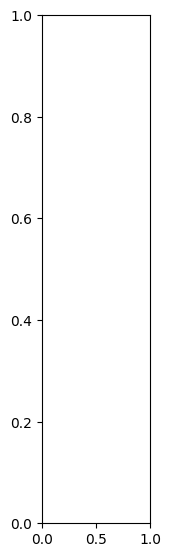

In [37]:
# Explain the model with shap
import shap
import numpy as np

models_for_shap = {
    #'Logistic Regression': logistic_regression,
    #'KNN': knn,
    'Decision Tree': decision_tree
}

for model_name, model in models_for_shap.items():
    explainer = shap.TreeExplainer(model)#, X_train_np, feature_names=np.array(X_train.columns).tolist())
    shap_values = explainer(X_train)
    print(f"Model: {model_name}")
    print(shap_values)
    shap.summary_plot(shap_values, X_train, plot_type="bar")
    #shap.plots.beeswarm(shap_values)
